# Milestones 2

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Image](https://www.bengkulunews.co.id/wp-content/uploads/2022/01/Do-I-need-insurance-1.jpg)

### Dataset

Pada project ini dataset yang digunakan adalah dataset tentang data klien yang memiliki asurasi pada sebuah perusahaan asuransi. Dataset ini berisi 1338 baris dengan 7 kolom yang diantaranya adalah age, sex, bmi, children, smoker, region, dan charges. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

Keterangan dari kolom pada dataset ini adalah:
| Feature | Description |
|---|---|
| age | Age of primary beneficiary |
| sex | Insurance contractor gender, female / male |
| bmi | Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. |
| children | Number of children covered by health insurance / Number of dependents |
| smoker | Smoker / Non - smoker |
| region | The beneficiary's residential area in the US, northeast, southeast, southwest, northwest. |
| charges | Individual medical costs billed by health insurance. |

### Objectives

## Import Libraries

Menggunakan extension `patch_sklearn()` dari Intel® untuk mempercepat training model.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Pada milestone 2 ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Data Loading

Membuat dataframe bernama `insurance` dari file `insurance.csv`.

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Characteristics

In [5]:
insurance.shape

(1338, 7)

Dataset ini memiliki **1338 baris** dan **7 kolom**.

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari basic information diatas dapat diketahui **tidak terdapat missing value** pada dataset ini dan dataset ini terdiri dari:
- 2 kolom bertipe data **float**
- 2 kolom bertipe data **integer**
- 3 kolom bertipe data **object**

In [7]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Jika dilihat dari summary statistics dari kolom-kolom numerik, hampir dari semua kolom memiliki distribusi yang normal, kecuali pada kolom `charges` dimana kolom ini memiliki mean dan median yang berjauhan dan nilai maksimumnya sangat berjauhan dengan quartile ketiga hal ini menandakan bahwa terdapat outlier pada kolom ini dan akan dilihat lebih detail pada bagian **EDA**.

## Data Cleaning

### Missing Value Check

Pada bagian ini akan dilakukan pengecekan terhadap missing value pada dataset.

In [8]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataset ini tidak memiliki missing value.

### Duplicated Data

Pada bagian ini akan dilakukan pengecekan terhadap data duplikat pada dataset.

In [9]:
insurance.duplicated().sum()

1

Ternyata dataset ini memiliki **1 duplicated data**.

In [10]:
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Data duplikat ini merupakan data dari seorang klien pria berusia 19 tahun. Karena ini merupakan data duplikat maka data ini akan dihapus dari dataframe.

In [12]:
insurance = insurance.drop_duplicates()

In [13]:
insurance.duplicated().sum()

0

Setelah dilakukan penghapusan, sekarang **tidak lagi terdapat data duplikat** pada dataset.

## Exploratory Data Analysis (EDA)

### Charges

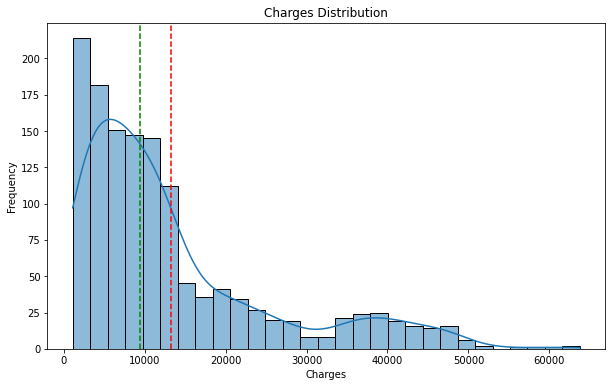

Skewness: 1.5153909108403483
Mean: 13279.121486655948
Median: 9386.1613


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(x='charges', data=insurance, kde=True)
plt.axvline(insurance['charges'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance['charges'].median(), color='g', linestyle='--', label='Median')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {insurance["charges"].skew()}')
print(f'Mean: {(insurance["charges"].mean())}')
print(f'Median: {insurance["charges"].median()}')

Rata-rata dari klien memiliki memiliki biaya asuransi sekitar **$13,279** namun ada juga klien yang biaya asuransinya lebih dari **$60,000** dimana klien ini merupakan outlier yang menyebabkan distribusi dari kolom `charges` menjadi **Right-Skewed** dengan nilai skewness **1.5**.